# **A Comparative Study of Random Forest and Gradient Boosting for Village Status Classification in Central Java**

## **Overview**

### **Outline Notebook**

* Overview
* Import Libraries
* Data Loading
* Data Preprocessing
* Data Exploration
* Data Splitting
* Data Exploration (Training Data)
* Random Oversampling
* Model Definition
* Model Training
* Model Evaluation
* Final Model
* Conclusion

<br> <br>

### **Attribute Information**

This dataset contains 14 attributes. Below is the explanation for each attribute in the dataset:

1. **kode\_prov**: Numeric code representing the province where a region is located.
2. **nama\_provinsi**: Name of the province where a region is located.
3. **kode\_kab**: Numeric code representing the regency/municipality within a province.
4. **nama\_kabupaten**: Name of the regency/municipality where a region is located.
5. **kode\_kec**: Numeric code representing the subdistrict within a regency/municipality.
6. **nama\_kecamatan**: Name of the subdistrict where a region is located.
7. **kode\_desa**: Numeric code representing the village/urban village within a subdistrict.
8. **nama\_desa**: Name of the village/urban village where a region is located.
9. **iks\_2024**: Social Resilience Index (IKS) in 2024, which measures the social aspect of resilience in a village.
10. **ike\_2024**: Economic Resilience Index (IKE) in 2024, which measures the economic resilience of a village.
11. **ikl\_2024**: Environmental Resilience Index (IKL) in 2024, which measures the environmental resilience of a village.
12. **nilai\_idm\_2024**: Village Development Index (IDM) score in 2024, which is a combination of IKS, IKE, and IKL to determine the village development status.
13. **status\_idm\_2024**: Category of village development status based on the IDM score, such as *Mandiri* (Independent), *Maju* (Advanced), *Berkembang* (Developing), *Tertinggal* (Disadvantaged), or *Sangat Tertinggal* (Highly Disadvantaged).
14. **keterangan**: Additional notes or other information related to the village, but only available in a small portion of the data.

<br> <br>

Dataset Link: [Dataset IDM](https://data.go.id/dataset/dataset/data-indeks-desa-membangun-tahun-2024)

## **Data Explanation**

**VILLAGE DEVELOPMENT INDEX (IDM)** <br>

### **Definition**

> **Village Development Index (IDM)** is a government initiative aimed at measuring the development status of villages, serving as the basis for drafting policy recommendations required in IDM measurement by the Ministry of Villages, Development of Disadvantaged Regions, and Transmigration. The Village Development Index was developed to strengthen efforts in achieving the goals of Village and Rural Area development. <br>

The Village Development Index (IDM) is a composite index formed from three indices: the Social Resilience Index (Indeks Ketahanan Sosial), the Economic Resilience Index (Indeks Ketahanan Ekonomi), and the Environmental Resilience Index (Indeks Ketahanan Lingkungan). IDM can determine the status of villages as *Mandiri* (Independent), *Maju* (Advanced), *Berkembang* (Developing), *Tertinggal* (Disadvantaged), or *Sangat Tertinggal* (Highly Disadvantaged) based on these index values.

<br><br>

### **Objectives of IDM**
* To determine the calculation of village funds in 2024 for affirmative allocation and performance allocation by the Ministry of Finance
* To understand the overview, growth, progress, and development of a village
* To serve as a reference in determining village status based on the index values
* To guide the policy direction of the central government
* To encourage the development of village self-reliance

## **Import Libraries**

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Data Exploration
import matplotlib.pyplot as plt

# Data Splitting
from sklearn.model_selection import train_test_split

# Random Oversampling
from imblearn.over_sampling import RandomOverSampler

# Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import geometric_mean_score

## **Data Loading**

Data loading is the process of acquiring, importing, or retrieving data from various sources

---

In [2]:
# Read the Excel file from the specified path and store it in a pandas DataFrame
df = pd.read_excel("indeks-desa-membangun-tahun-2024-jateng.xlsx")

# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Display the first and last rows of the data
df

,kode_prov,nama_provinsi,kode_kab,nama_kabupaten,kode_kec,nama_kecamatan,kode_desa,nama_desa,iks_2024,ike_2024,ikl_2024,nilai_idm_2024,status_idm_2024,keterangan
0,33,JAWA TENGAH,3301,CILACAP,330101,KEDUNGREJA,3301012001,TAMBAKREJA,0.8343,0.6667,0.6667,0.7225,MAJU,NaN
1,33,JAWA TENGAH,3301,CILACAP,330101,KEDUNGREJA,3301012002,BUMIREJA,0.8229,0.6167,0.6000,0.6798,BERKEMBANG,NaN
2,33,JAWA TENGAH,3301,CILACAP,330101,KEDUNGREJA,3301012003,CIKLAPA,0.8000,0.6500,0.8000,0.7500,MAJU,NaN
3,33,JAWA TENGAH,3301,CILACAP,330101,KEDUNGREJA,3301012004,KEDUNGREJA,0.8514,0.5667,0.6667,0.6949,BERKEMBANG,NaN
4,33,JAWA TENGAH,3301,CILACAP,330101,KEDUNGREJA,3301012005,TAMBAKSARI,0.8343,0.6167,0.6000,0.6837,BERKEMBANG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7805,33,JAWA TENGAH,3329,BREBES,332917,BANJARHARJO,3329172021,PENDE,0.8114,0.6500,0.6667,0.7094,MAJU,NaN
7806,33,JAWA TENGAH,3329,BREBES,332917,BANJARHARJO,3329172022,SINDANGHEULA,0.8000,0.6000,0.8000,0.7333,MAJU,NaN
7807,33,JAWA TENGAH,3329,BREBES,332917,BANJARHARJO,3329172023,SUKAREJA,0.8343,0.6500,0.6667,0.7170,MAJU,NaN
7808,33,JAWA TENGAH,3329,BREBES,332917,BANJARHARJO,3329172024,TEGALREJA,0.7600,0.6167,0.6667,0.6811,BERKEMBANG,NaN


## **Data Preprocessing**

Data preprocessing refers to the initial steps taken to clean, transform, and organize raw data before it can be effectively utilized for analysis or machine learning.

---

### Missing Value

In [3]:
# Check the number of missing values in the dataset
df.isnull().sum()

kode_prov             0
nama_provinsi         0
kode_kab              0
nama_kabupaten        0
kode_kec              0
nama_kecamatan        0
kode_desa             0
nama_desa             0
iks_2024              0
ike_2024              0
ikl_2024              0
nilai_idm_2024        0
status_idm_2024       0
keterangan         7737
dtype: int64

The "keterangan" column was removed because most of the values in this column were empty, with only 73 out of 7,810 rows containing data. This column mainly consisted of notes or additional information that was not relevant for quantitative analysis. Since it did not provide a significant contribution to the model or statistical calculations, and to simplify the analysis process, the column was removed. Although the column might contain supplementary information, because the majority of its values were empty and it did not affect the analysis results, removing the column was considered more efficient.

### Drop Columns

In [4]:
# Remove specific columns from the dataset
df = df.drop(columns=['kode_prov', 'nama_provinsi', 'kode_kab', 'nama_kabupaten', 'kode_kec', 'nama_kecamatan', 'kode_desa', 'nama_desa','nilai_idm_2024','keterangan'])

These columns were removed from the dataset because the information contained within them is categorical in nature and not relevant for the analysis or modeling to be performed. Removing these columns also helps reduce dataset complexity and allows the focus to remain on features that are more relevant to the analysis or modeling objectives.

Below is the explanation for why each column was removed:

1. **`kode_prov`**
   This column contains the province code, which is an administrative identifier that does not provide direct information or relevance for the analysis or modeling to be performed. The province code serves more as an identifying attribute and does not affect the analysis results.

2. **`nama_provinsi`**
   Similar to `kode_prov`, this column contains the name of the province, which is categorical and does not have a direct influence on the variables being analyzed. Province names are more suitable for grouping or identifying data, not for predictive modeling.

3. **`kode_kab`**
   This column contains the regency/municipality code, which is only used for administrative identification. It does not provide additional relevant information for analysis or modeling.

4. **`nama_kabupaten`**
   This column contains the name of the regency/municipality, which is similar in nature to the `nama_provinsi` column. Regency names do not contribute to building a predictive model and are therefore unnecessary in the dataset for analysis.

5. **`kode_kec`**
   This column contains the subdistrict code, which is also administrative in nature. The subdistrict code may be useful for grouping data by region but does not contribute directly to the analysis or model being developed.

6. **`nama_kecamatan`**
   Similar to `nama_kabupaten` and `nama_provinsi`, this column only contains the name of the subdistrict, which is categorical and does not have a significant impact on the target variable being analyzed.

7. **`kode_desa`**
   This column contains the village code, which is an administrative identifier not needed for analysis or modeling. Village codes tend to be specific and do not contribute to understanding data patterns.

8. **`nama_desa`**
   This column contains the village name, which serves as a regional identifier. As with the other columns, it is not relevant for analysis or modeling, since it does not influence the target variable or other variables required for data analysis.

By removing these columns, the dataset becomes more focused on relevant variables, helping to improve analysis efficiency and reduce model complexity.

### Outlier

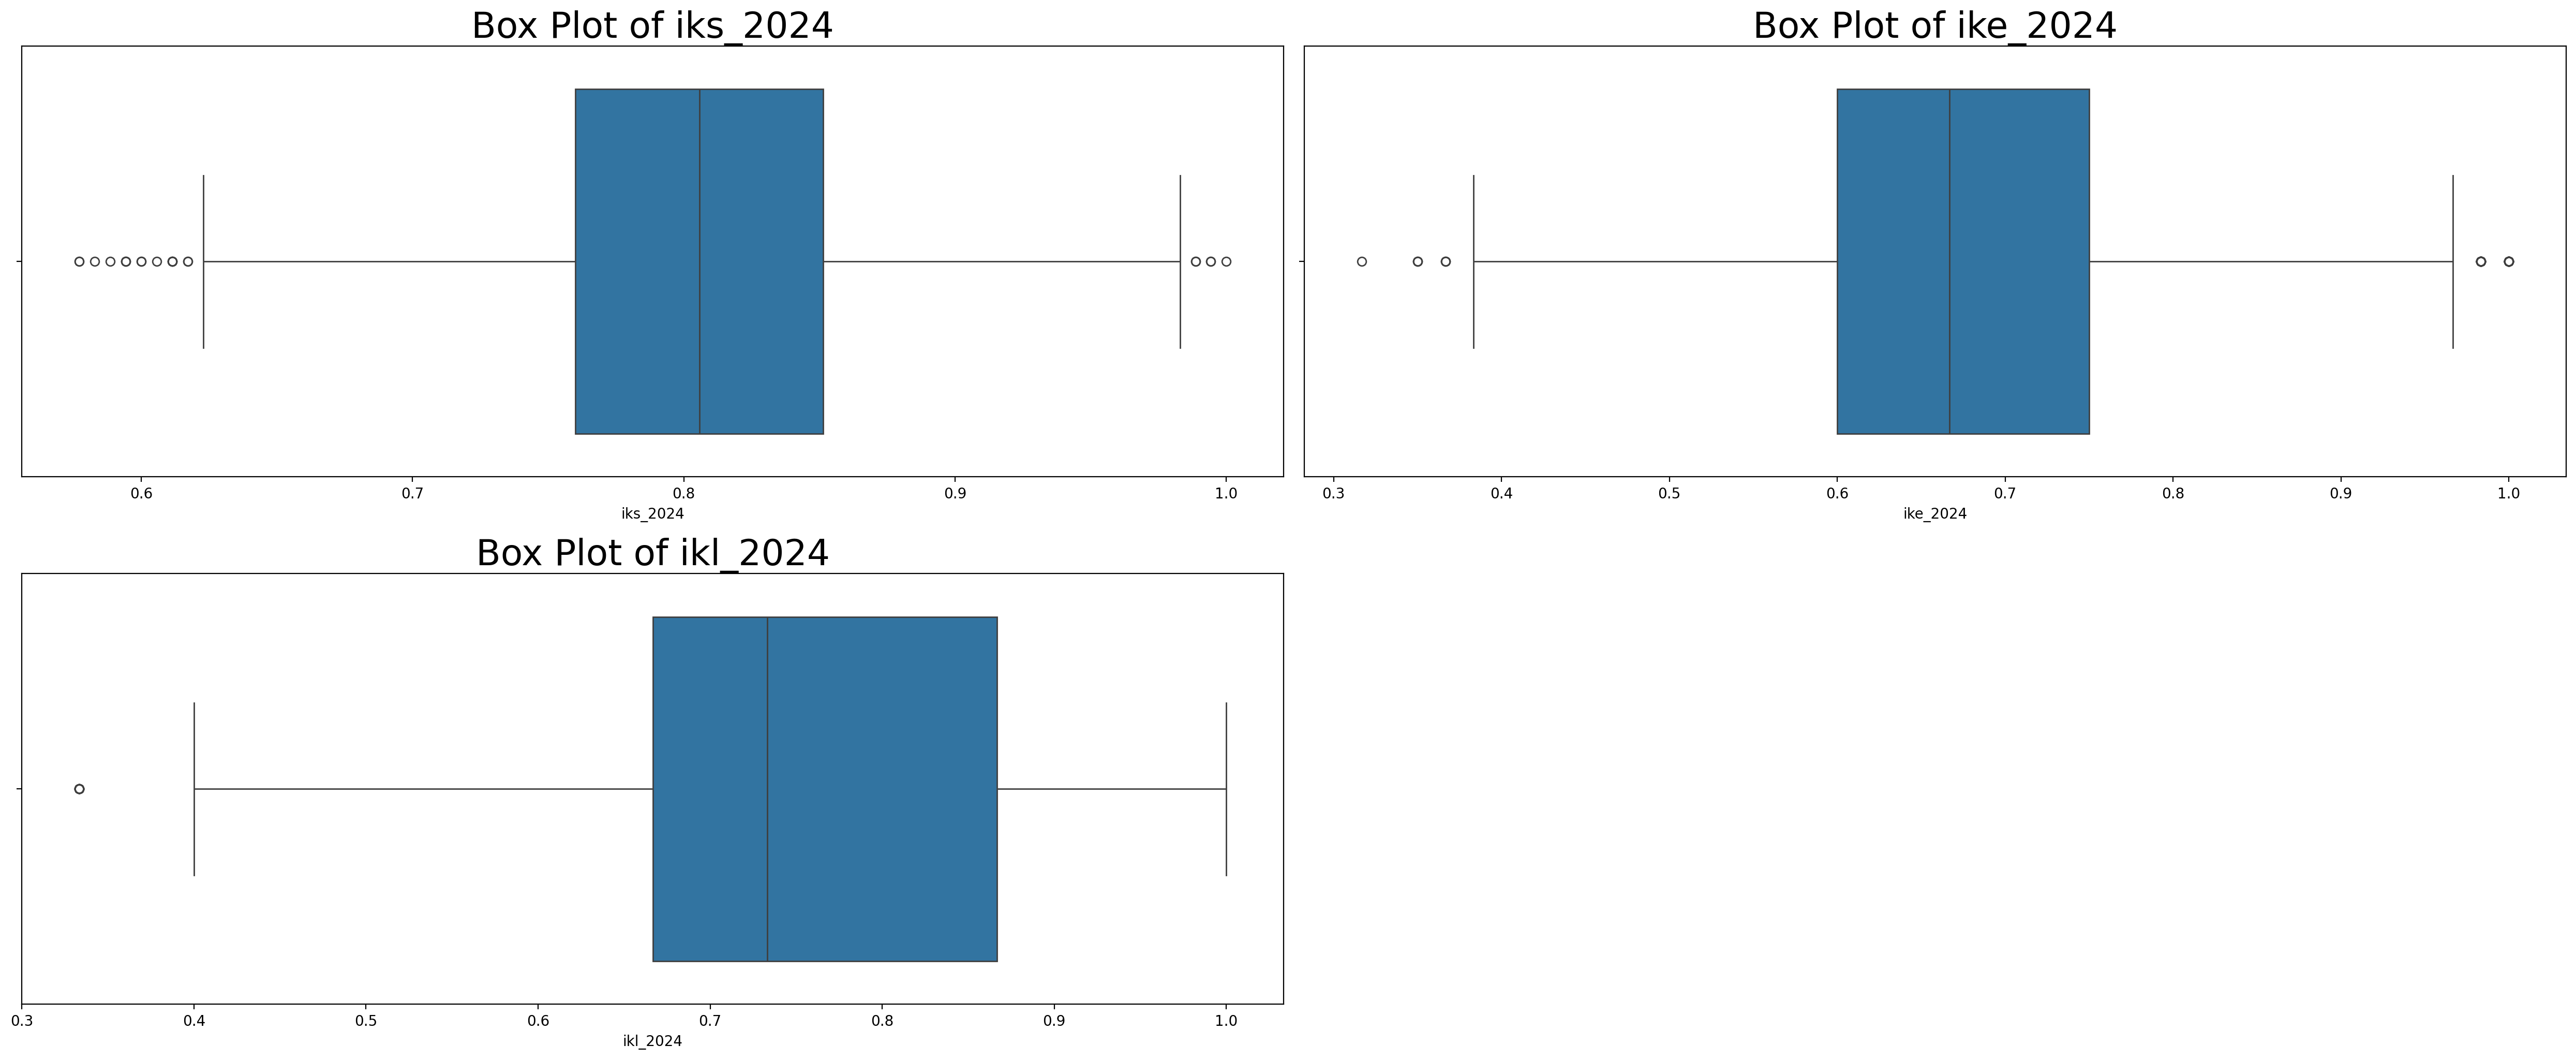

,Number of Outliers,Percentage of Outliers
Variable,,
ike_2024,38,0.49%
iks_2024,21,0.27%
ikl_2024,10,0.13%


In [5]:
# Function definition
def create_boxplot(nrows, ncols, data, x_axis):
    fig, ax = plt.subplots(nrows, ncols, figsize=(25, 15), dpi=200)
    n = 0

    for i in range(nrows):
        for j in range(ncols):
            if n < len(x_axis):
                sns.boxplot(data=data, x=x_axis[n], ax=ax[i, j])
                ax[i, j].set_title(f"Box Plot of {x_axis[n]}", fontsize=25)
                n += 1
            else:
                ax[i, j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Function for outlier detection
def find_outlier(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

# Function to display the number of outliers in a table
def show_outlier(data, variables):
    outlier_counts = []
    percentages = []

    for var in variables:
        outliers = find_outlier(data[var])
        count = len(outliers)
        perc = (count / len(data)) * 100
        outlier_counts.append(count)
        percentages.append(perc)

    result = pd.DataFrame({
        "Variable": variables,
        "Number of Outliers": outlier_counts,
        "Percentage of Outliers": [f"{p:.2f}%" for p in percentages]
    })

    return result.sort_values(by="Number of Outliers", ascending=False).set_index("Variable")

# Call the functions
num_cols = df.select_dtypes(include='number').columns.tolist()
create_boxplot(3, 2, df, num_cols)  # Adjust the number of rows and columns for subplots
show_outlier(df, num_cols)

In [6]:
df

,iks_2024,ike_2024,ikl_2024,status_idm_2024
0,0.8343,0.6667,0.6667,MAJU
1,0.8229,0.6167,0.6000,BERKEMBANG
2,0.8000,0.6500,0.8000,MAJU
3,0.8514,0.5667,0.6667,BERKEMBANG
4,0.8343,0.6167,0.6000,BERKEMBANG
...,...,...,...,...
7805,0.8114,0.6500,0.6667,MAJU
7806,0.8000,0.6000,0.8000,MAJU
7807,0.8343,0.6500,0.6667,MAJU
7808,0.7600,0.6167,0.6667,BERKEMBANG


In [7]:
# Create a DataFrame summarizing various statistics for each column in the original DataFrame df
pd.DataFrame({
    "type": df.dtypes.values,  # Extract and display the data types of each column
    "null": df.isnull().sum().values,  # Count and display the number of null values in each column
    "null_percentage": df.isnull().sum().values / len(df) * 100,  # Calculate and display the percentage of null values for each column
    "unique": [df[i].nunique() for i in df.columns],  # Count and display the number of unique values in each column
    "sample": [list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]  # Extract a random sample from the unique values in each column
}).set_index(df.isnull().sum().index).sort_values("null", ascending=False)

,type,null,null_percentage,unique,sample
iks_2024,float64,0,0.0,75,0.7371
ike_2024,float64,0,0.0,41,0.85
ikl_2024,float64,0,0.0,11,0.4667
status_idm_2024,object,0,0.0,4,MAJU


## **Data Exploration (Overall Data)**
---

In [8]:
df.describe()

,iks_2024,ike_2024,ikl_2024
count,7810.000000,7810.000000,7810.000000
mean,0.805810,0.679639,0.760145
std,0.064536,0.111776,0.135588
min,0.577100,0.316700,0.333300
25%,0.760000,0.600000,0.666700
50%,0.805700,0.666700,0.733300
75%,0.851400,0.750000,0.866700
max,1.000000,1.000000,1.000000


### IDM Status Distribution

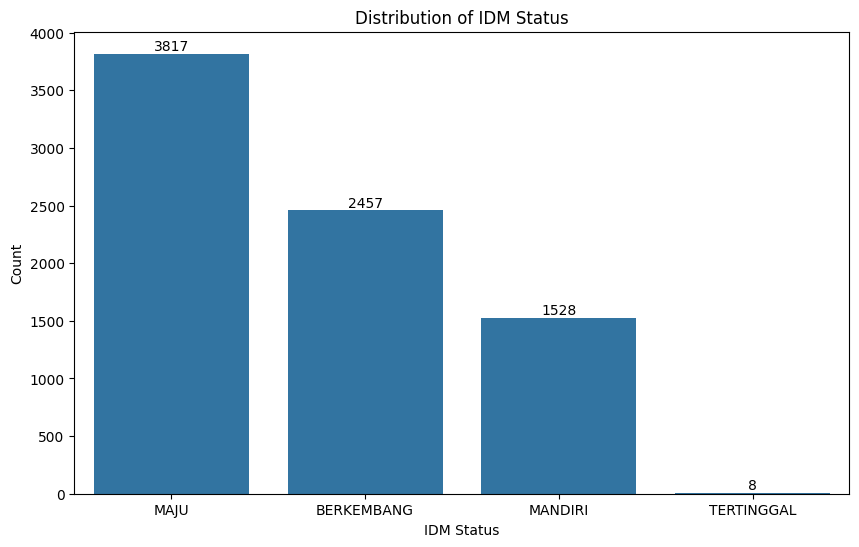

In [9]:
# Create plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='status_idm_2024', data=df)

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Add labels and title
plt.title('Distribution of IDM Status')
plt.xlabel('IDM Status')
plt.ylabel('Count')

# Show plot
plt.show()

**Description based on the IDM status distribution chart**

1. The majority of villages fall into the "Maju" (Advanced) category, with a total of 3,817 villages.
2. This is followed by villages in the "Berkembang" (Developing) category, totaling 2,457 villages.
3. The number of villages classified as "Mandiri" (Independent) is smaller, amounting to 1,528 villages.
4. Only 8 villages are categorized as "Tertinggal" (Underdeveloped), indicating a very small proportion.

### Percentage Distribution of IDM Status

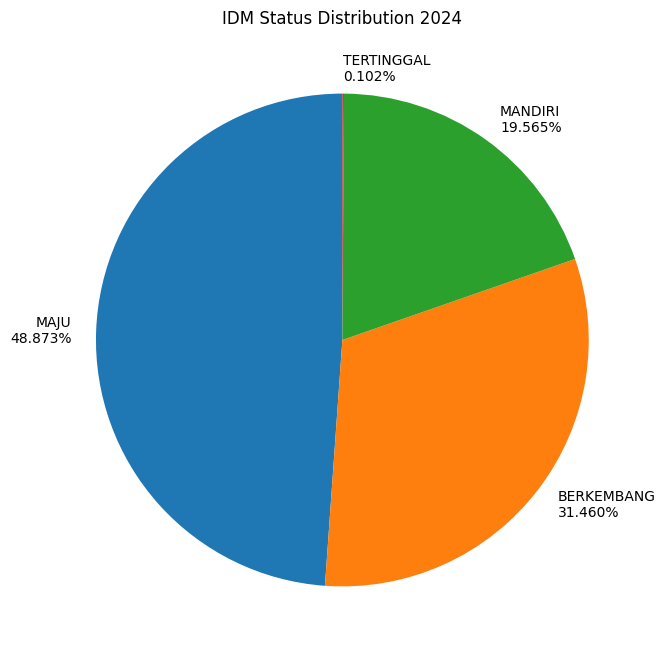

In [10]:
# Calculate frequency
counts = df['status_idm_2024'].value_counts()
labels = counts.index.tolist()
sizes = counts.values
total = sizes.sum()

# Calculate percentages and round to 3 decimals
percentages = [size / total * 100 for size in sizes]
rounded = [round(p, 3) for p in percentages]

# Correct the last element so that the total is exactly 100%
diff = 100 - sum(rounded)
rounded[-1] += diff

# Create manual labels: "Category\nxx.xxx%"
pie_labels = [f"{lab}\n{pct:.3f}%" for lab, pct in zip(labels, rounded)]

# Plot
plt.figure(figsize=(8,8))
plt.pie(
    sizes,
    labels=pie_labels,
    startangle=90
)
plt.title('IDM Status Distribution 2024')
plt.show()

### Correlation Matrix

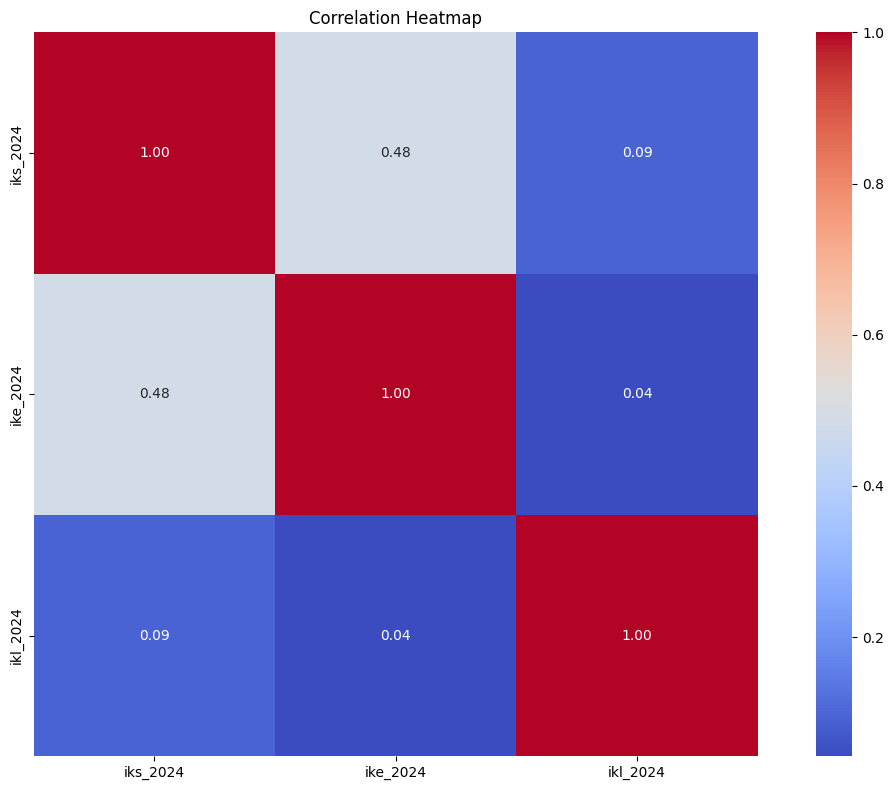

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include='number').corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## **Data Splitting**
---

In [12]:
# Split the dataset into feature variables and target variable
X = df[['iks_2024', 'ike_2024', 'ikl_2024']]
y = df['status_idm_2024']

In [13]:
# SPLIT 90:10
# Split the data into 90% training data and 10% testing data
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=0)

print(f"\n========== Data Split 90:10 ==========")
# Display the number of training samples and their percentage of the total data
print(f"Training data\t\t: {len(X_train_90)}\t({round(len(X_train_90) / len(X) * 100)}%)")
# Display the number of testing samples and their percentage of the total data
print(f"Testing data\t\t: {len(X_test_90)}\t({round(len(X_test_90) / len(X) * 100)}%)")

# Combine features and target into one DataFrame for training data
df_train_90 = pd.concat([pd.DataFrame(X_train_90), pd.DataFrame(y_train_90, columns=['status_idm_2024'])], axis=1)
# Combine features and target into one DataFrame for testing data
df_test_90  = pd.concat([pd.DataFrame(X_test_90), pd.DataFrame(y_test_90, columns=['status_idm_2024'])], axis=1)

# Save the training and testing data to Excel files
df_train_90.to_excel("df_train_90.xlsx", index=False)
df_test_90.to_excel("df_test_90.xlsx", index=False)


========== Data Split 90:10 ==========
Training data		: 7029	(90%)
Testing data		: 781	(10%)


In [14]:
# SPLIT 80:20
# Splitting the data into 80% training data and 20% testing data
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"\n========== Data Split 80:20 ==========")
# Display the number of training data and its percentage of the total data
print(f"Training data\t\t: {len(X_train_80)}\t({round(len(X_train_80) / len(X) * 100)}%)")
# Display the number of testing data and its percentage of the total data
print(f"Testing data\t\t: {len(X_test_80)}\t({round(len(X_test_80) / len(X) * 100)}%)")

# Combine features and target for training data into one DataFrame
df_train_80 = pd.concat([pd.DataFrame(X_train_80), pd.DataFrame(y_train_80, columns=['status_idm_2024'])], axis=1)
# Combine features and target for testing data into one DataFrame
df_test_80  = pd.concat([pd.DataFrame(X_test_80), pd.DataFrame(y_test_80, columns=['status_idm_2024'])], axis=1)

# Save the training and testing data into Excel files
df_train_80.to_excel("df_train_80.xlsx", index=False)
df_test_80.to_excel("df_test_80.xlsx", index=False)


========== Data Split 80:20 ==========
Training data		: 6248	(80%)
Testing data		: 1562	(20%)


In [15]:
# SPLIT 70:30
# Split the data into 70% training data and 30% testing data
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=0)

print(f"\n========== Data Split 70:30 ==========")
# Display the number of training data and its percentage of the total data
print(f"Training data\t\t: {len(X_train_70)}\t({round(len(X_train_70) / len(X) * 100)}%)")
# Display the number of testing data and its percentage of the total data
print(f"Testing data\t\t: {len(X_test_70)}\t({round(len(X_test_70) / len(X) * 100)}%)")

# Combine features and target for the training data into a single DataFrame
df_train_70 = pd.concat([pd.DataFrame(X_train_70), pd.DataFrame(y_train_70, columns=['status_idm_2024'])], axis=1)
# Combine features and target for the testing data into a single DataFrame
df_test_70  = pd.concat([pd.DataFrame(X_test_70), pd.DataFrame(y_test_70, columns=['status_idm_2024'])], axis=1)

# Save training and testing data into Excel files
df_train_70.to_excel("df_train_70.xlsx", index=False)
df_test_70.to_excel("df_test_70.xlsx", index=False)


========== Data Split 70:30 ==========
Training data		: 5467	(70%)
Testing data		: 2343	(30%)


In [16]:
# Download split 70:30
#files.download("df_train_70.xlsx")
#files.download("df_test_70.xlsx")

# Download split 80:20
#files.download("df_train_80.xlsx")
#files.download("df_test_80.xlsx")

# Download split 90:10
#files.download("df_train_90.xlsx")
#files.download("df_test_90.xlsx")

## **Data Exploration (Training Data)**
---

### IDM Status Distribution

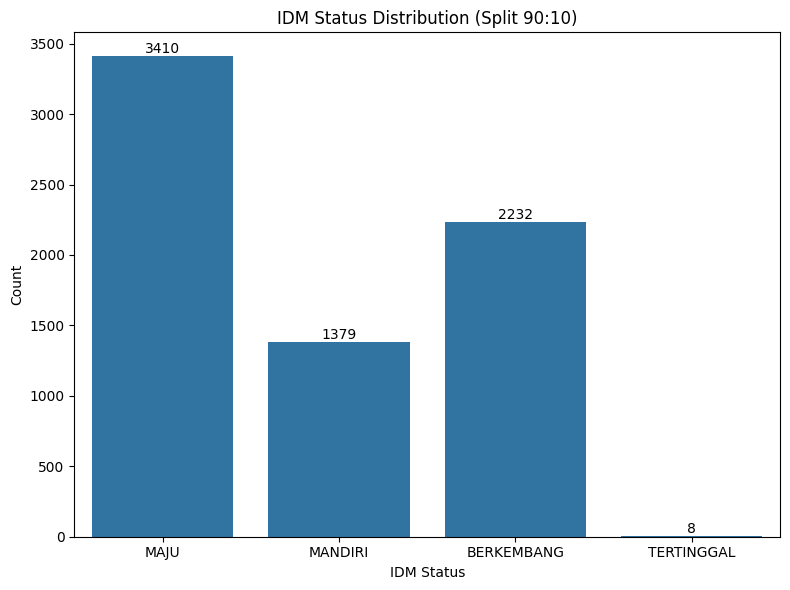

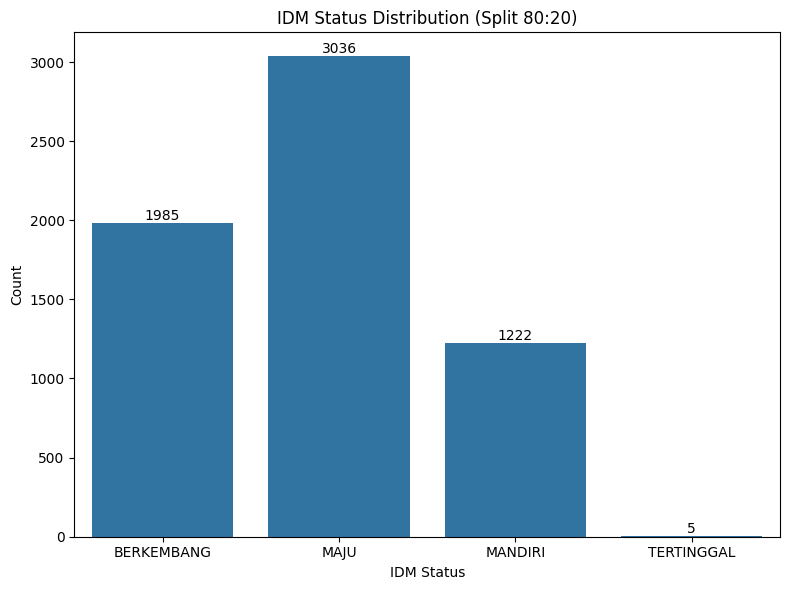

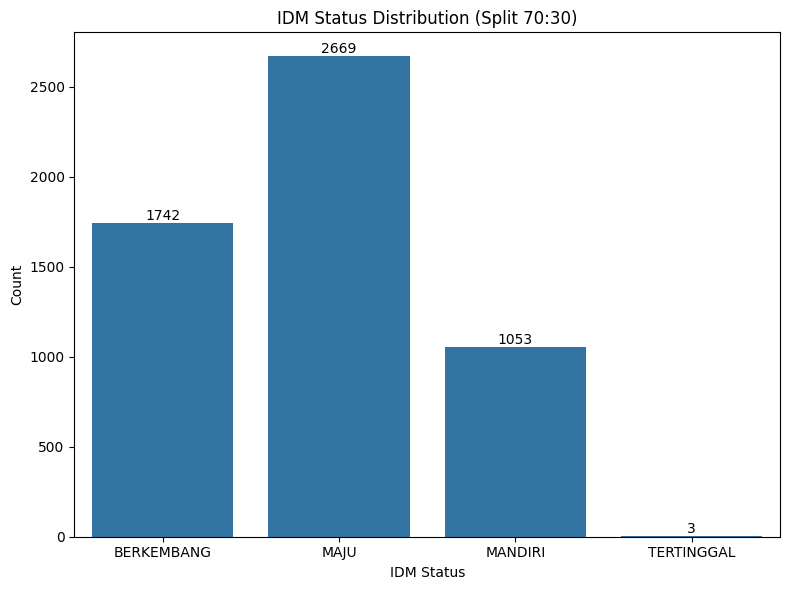

In [17]:
# Function to create a countplot with count annotations
def plot_class_distribution(df_train, split_label):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='status_idm_2024', data=df_train)

    # Add count annotations above each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

    # Labels and display
    plt.title(f'IDM Status Distribution (Split {split_label})')
    plt.xlabel('IDM Status')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Show distribution for each split
plot_class_distribution(df_train_90, '90:10')
plot_class_distribution(df_train_80, '80:20')
plot_class_distribution(df_train_70, '70:30')

### Percentage Distribution of IDM Status

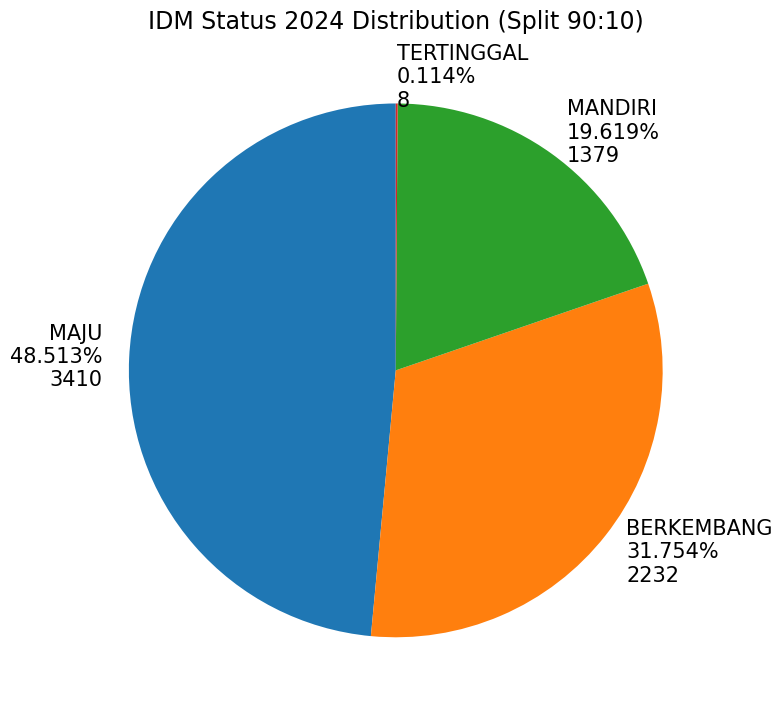

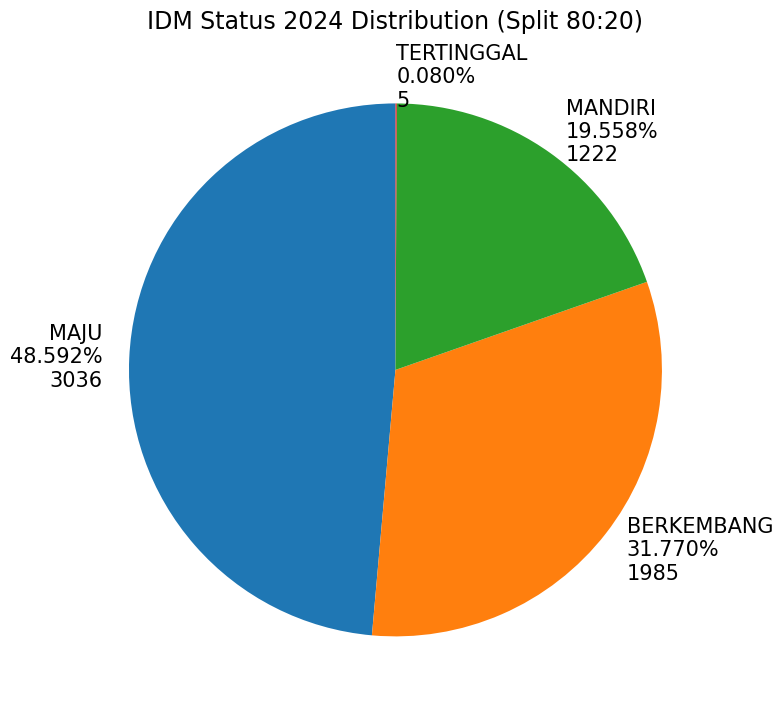

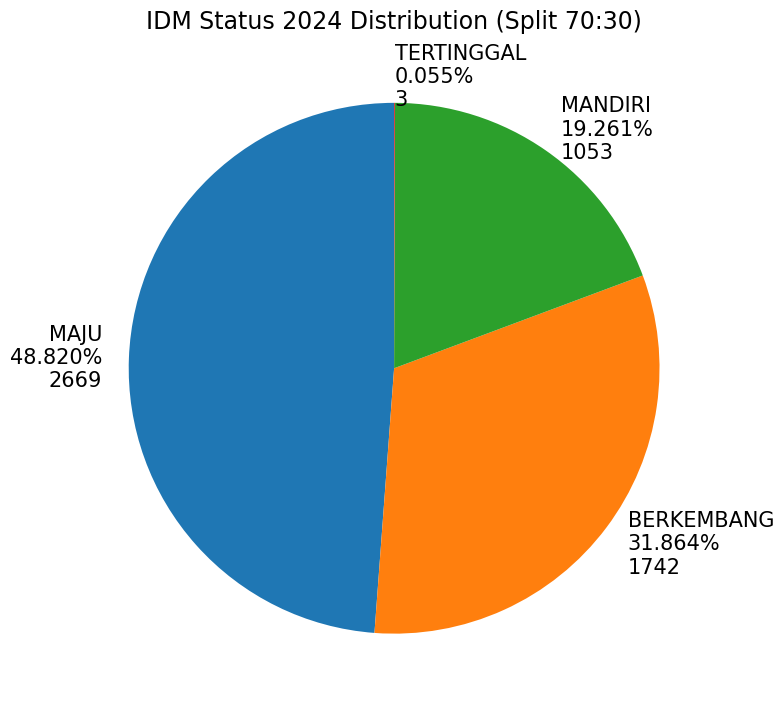

In [18]:
# Function to create a pie chart of the target distribution with counts per class
def plot_pie_distribution(df_train, split_label):
    # Calculate frequency and percentage
    counts = df_train['status_idm_2024'].value_counts()
    labels = counts.index.tolist()
    sizes = counts.values
    total = sizes.sum()

    # Percentages
    percentages = [size / total * 100 for size in sizes]
    rounded = [round(p, 3) for p in percentages]
    diff = 100 - sum(rounded)
    rounded[-1] += diff

    # Label: "Category\nxx.xxx%\nxxx samples"
    pie_labels = [
        f"{lab}\n{pct:.3f}%\n{size}"
        for lab, pct, size in zip(labels, rounded, sizes)
    ]

    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        sizes,
        labels=pie_labels,
        startangle=90,
        autopct=None,
        textprops={'fontsize': 15}
    )
    plt.title(f'IDM Status 2024 Distribution (Split {split_label})', fontsize=17)
    plt.tight_layout()
    plt.show()

# Example function calls for each data split
plot_pie_distribution(df_train_90, '90:10')
plot_pie_distribution(df_train_80, '80:20')
plot_pie_distribution(df_train_70, '70:30')

## **Random Oversampling**
Random Oversampling is a resampling technique used to handle imbalanced datasets. It works by randomly duplicating samples from the minority class until the number of samples in that class is similar to the majority class.

---

In [19]:
# Check label distribution before SMOTE for all split ratios
y_trains = {
    '90:10': y_train_90,
    '80:20': y_train_80,
    '70:30': y_train_70
}

for split_label, y in y_trains.items():
    print(f"\n===== Before Oversampling ({split_label}) =====")
    print(pd.Series(y).value_counts())


===== Before Oversampling (90:10) =====
status_idm_2024
MAJU          3410
BERKEMBANG    2232
MANDIRI       1379
TERTINGGAL       8
Name: count, dtype: int64

===== Before Oversampling (80:20) =====
status_idm_2024
MAJU          3036
BERKEMBANG    1985
MANDIRI       1222
TERTINGGAL       5
Name: count, dtype: int64

===== Before Oversampling (70:30) =====
status_idm_2024
MAJU          2669
BERKEMBANG    1742
MANDIRI       1053
TERTINGGAL       3
Name: count, dtype: int64


In [20]:
# SPLIT 90:10
ros_90 = RandomOverSampler(random_state=0)
X_train_ros_90, y_train_ros_90 = ros_90.fit_resample(X_train_90, y_train_90)
print("\n=== After ROS (90:10) ===")
print(pd.Series(y_train_ros_90).value_counts())

# SPLIT 80:20
ros_80 = RandomOverSampler(random_state=0)
X_train_ros_80, y_train_ros_80 = ros_80.fit_resample(X_train_80, y_train_80)
print("\n=== After ROS (80:20) ===")
print(pd.Series(y_train_ros_80).value_counts())

# SPLIT 70:30
ros_70 = RandomOverSampler(random_state=0)
X_train_ros_70, y_train_ros_70 = ros_70.fit_resample(X_train_70, y_train_70)
print("\n=== After ROS (70:30) ===")
print(pd.Series(y_train_ros_70).value_counts())


=== After ROS (90:10) ===
status_idm_2024
MAJU          3410
MANDIRI       3410
BERKEMBANG    3410
TERTINGGAL    3410
Name: count, dtype: int64

=== After ROS (80:20) ===
status_idm_2024
BERKEMBANG    3036
MAJU          3036
MANDIRI       3036
TERTINGGAL    3036
Name: count, dtype: int64

=== After ROS (70:30) ===
status_idm_2024
BERKEMBANG    2669
MAJU          2669
MANDIRI       2669
TERTINGGAL    2669
Name: count, dtype: int64


In [21]:
df_ros_90 = pd.DataFrame({'status_idm_2024': y_train_ros_90})
df_ros_80 = pd.DataFrame({'status_idm_2024': y_train_ros_80})
df_ros_70 = pd.DataFrame({'status_idm_2024': y_train_ros_70})

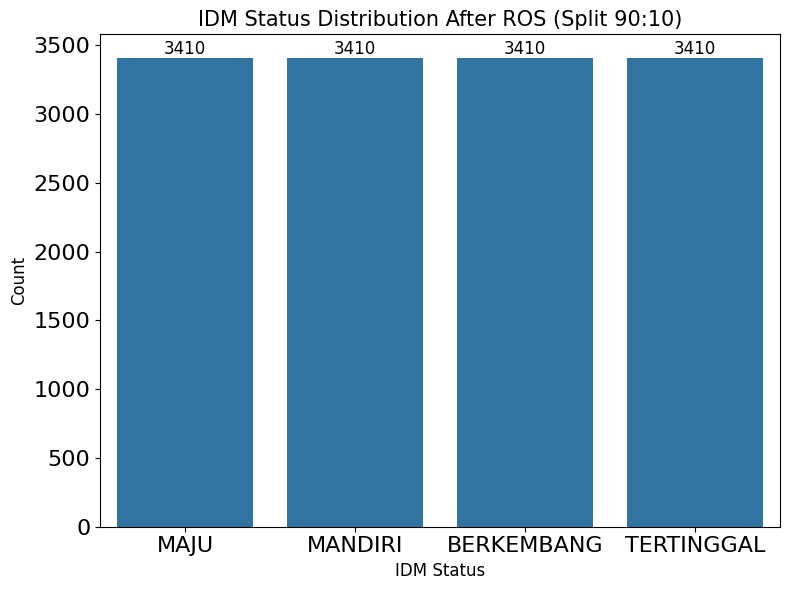

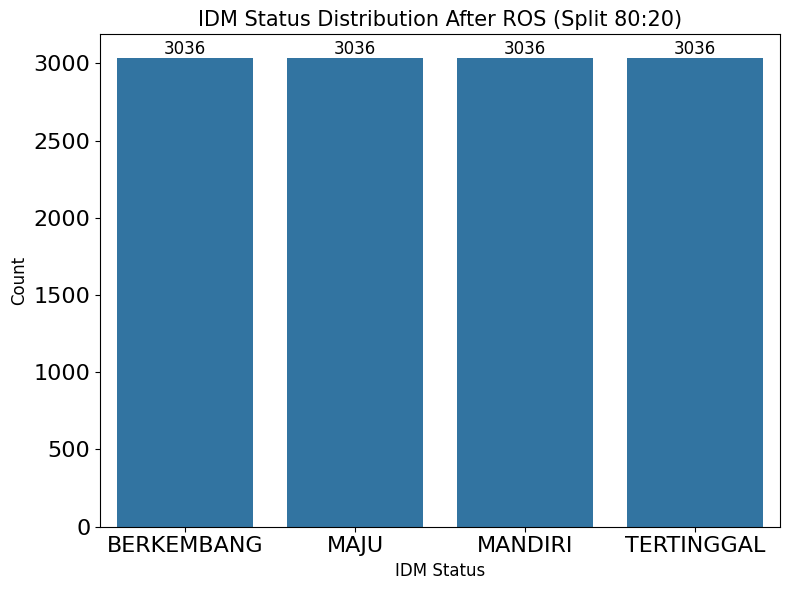

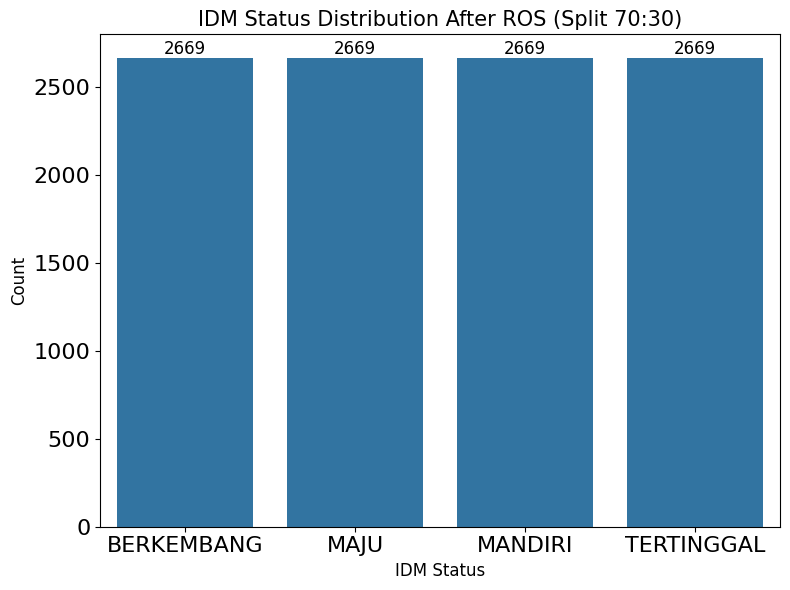

In [22]:
# Function to create a countplot of ROS results with annotations
def plot_class_distribution_ros(df_ros, split_label):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='status_idm_2024', data=df_ros)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=12)

    plt.title(f'IDM Status Distribution After ROS (Split {split_label})', fontsize=15)
    plt.xlabel('IDM Status', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0, fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.show()

# Display histogram for each ROS split
plot_class_distribution_ros(df_ros_90, '90:10')
plot_class_distribution_ros(df_ros_80, '80:20')
plot_class_distribution_ros(df_ros_70, '70:30')

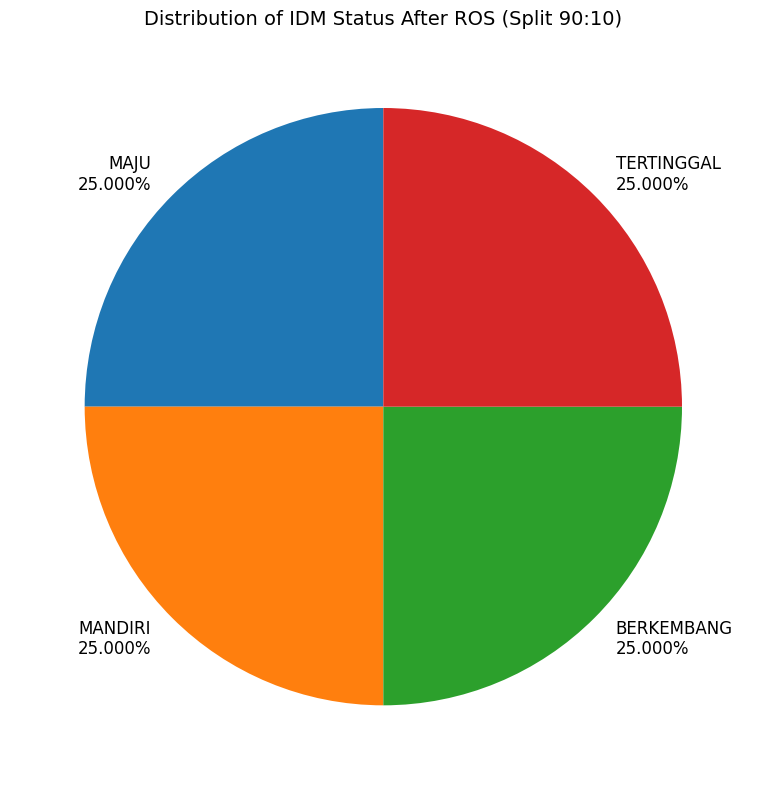

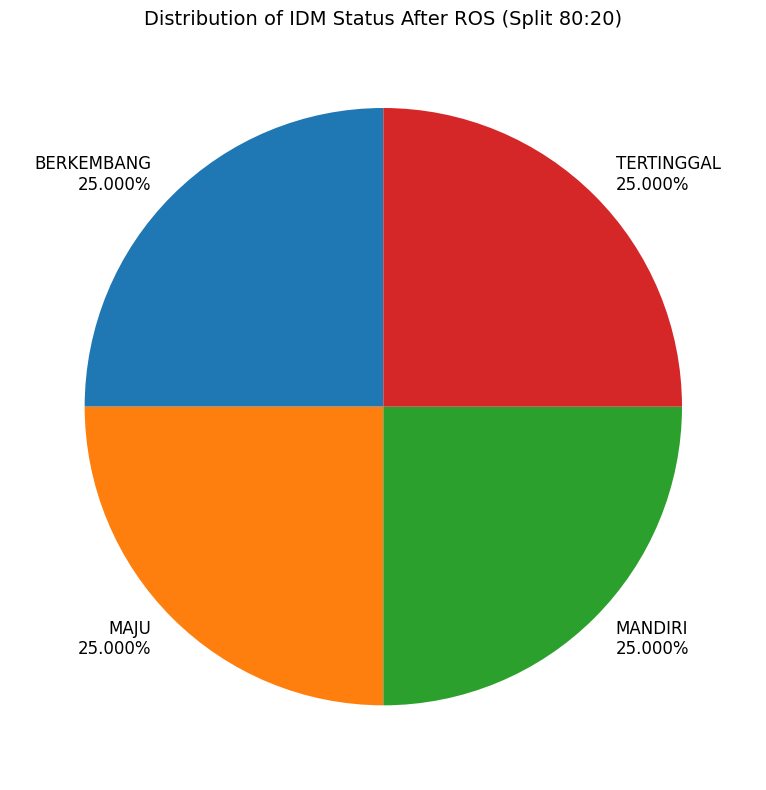

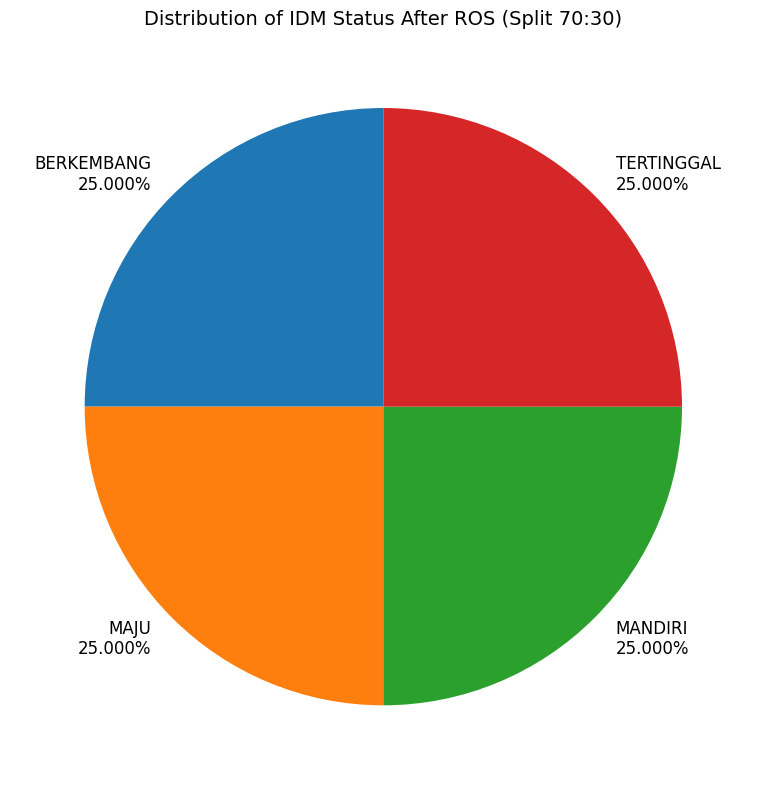

In [23]:
# Function for pie chart with rounding and total correction
def plot_pie(df, title):
    counts = df['status_idm_2024'].value_counts()
    labels = counts.index.tolist()
    sizes = counts.values
    total = sizes.sum()

    # Calculate percentages
    percentages = [size / total * 100 for size in sizes]
    rounded = [round(p, 3) for p in percentages]

    # Correction so that total = 100%
    diff = round(100 - sum(rounded), 3)
    rounded[-1] += diff

    # Final label: Category\nxx.xxx%
    pie_labels = [f"{lab}\n{pct:.3f}%" for lab, pct in zip(labels, rounded)]

    # Plot
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=pie_labels, startangle=90, textprops={'fontsize': 12})
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Pie chart for each ROS split
plot_pie(df_ros_90, 'Distribution of IDM Status After ROS (Split 90:10)')
plot_pie(df_ros_80, 'Distribution of IDM Status After ROS (Split 80:20)')
plot_pie(df_ros_70, 'Distribution of IDM Status After ROS (Split 70:30)')

## **Classification**
---

### Gradient Boosting

Gradient Boosting builds a strong predictive model by combining many weak learners (decision trees) in a sequential way.Each new tree is trained to correct the errors (residuals) made by the previous trees.

In [24]:
# MODEL 90:10
gbm_model_90 = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=0
)
gbm_model_90.fit(X_train_ros_90, y_train_ros_90)

# MODEL 80:20
gbm_model_80 = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=0
)
gbm_model_80.fit(X_train_ros_80, y_train_ros_80)

# MODEL 70:30
gbm_model_70 = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=0
)
gbm_model_70.fit(X_train_ros_70, y_train_ros_70)

GradientBoostingClassifier(random_state=0)

### Random Forest
Random Forest works by building a large number of decision trees and then combining their results to make a final prediction. Each tree is trained on a random sample of the data (bagging). For classification, the final output is decided by majority voting from all trees.

In [25]:
# MODEL RF – Split 90:10
rf_model_90 = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    random_state=0
)
rf_model_90.fit(X_train_ros_90, y_train_ros_90)

# MODEL RF – Split 80:20
rf_model_80 = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    random_state=0
)
rf_model_80.fit(X_train_ros_80, y_train_ros_80)

# MODEL RF – Split 70:30
rf_model_70 = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    random_state=0
)
rf_model_70.fit(X_train_ros_70, y_train_ros_70)

RandomForestClassifier(random_state=0)

## **Evaluation (Training)**
---

### Random Forest

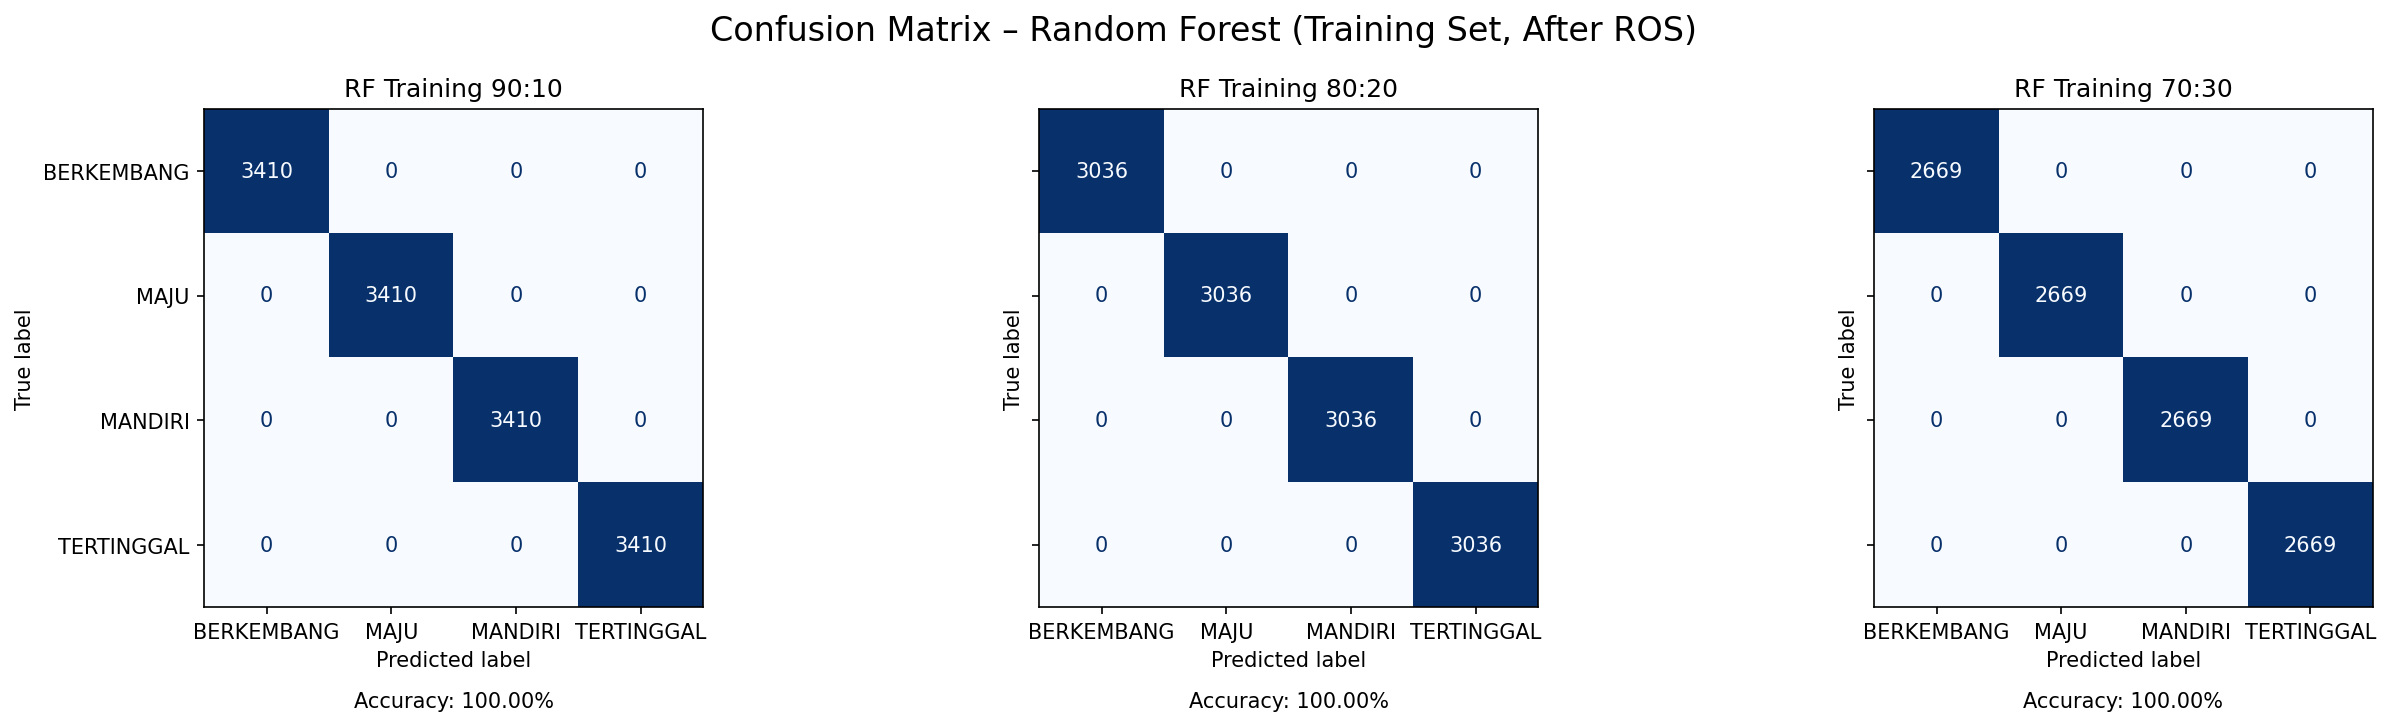

In [26]:
# List of models and training data
rf_train_data = {
    "90:10": (rf_model_90, X_train_ros_90, y_train_ros_90),
    "80:20": (rf_model_80, X_train_ros_80, y_train_ros_80),
    "70:30": (rf_model_70, X_train_ros_70, y_train_ros_70),
}

# Get unique labels from one of the sets (assuming all are the same)
class_labels = sorted(np.unique(y))

# Create 1 row of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), dpi=150, sharex=True, sharey=True)

# Loop through each split
for i, (split_name, (model, X_train, y_train)) in enumerate(rf_train_data.items()):
    y_pred = model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred, labels=class_labels)
    acc = accuracy_score(y_train, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=axes[i], cmap="Blues", colorbar=False)
    axes[i].set_title(f"RF Training {split_name}")
    axes[i].grid(False)
    axes[i].text(0.5, -0.2, f"Accuracy: {acc:.2%}", transform=axes[i].transAxes, ha='center', fontsize=10)

plt.suptitle("Confusion Matrix – Random Forest (Training Set, After ROS)", fontsize=16)
plt.tight_layout()
plt.show()

### Gradient Boosting

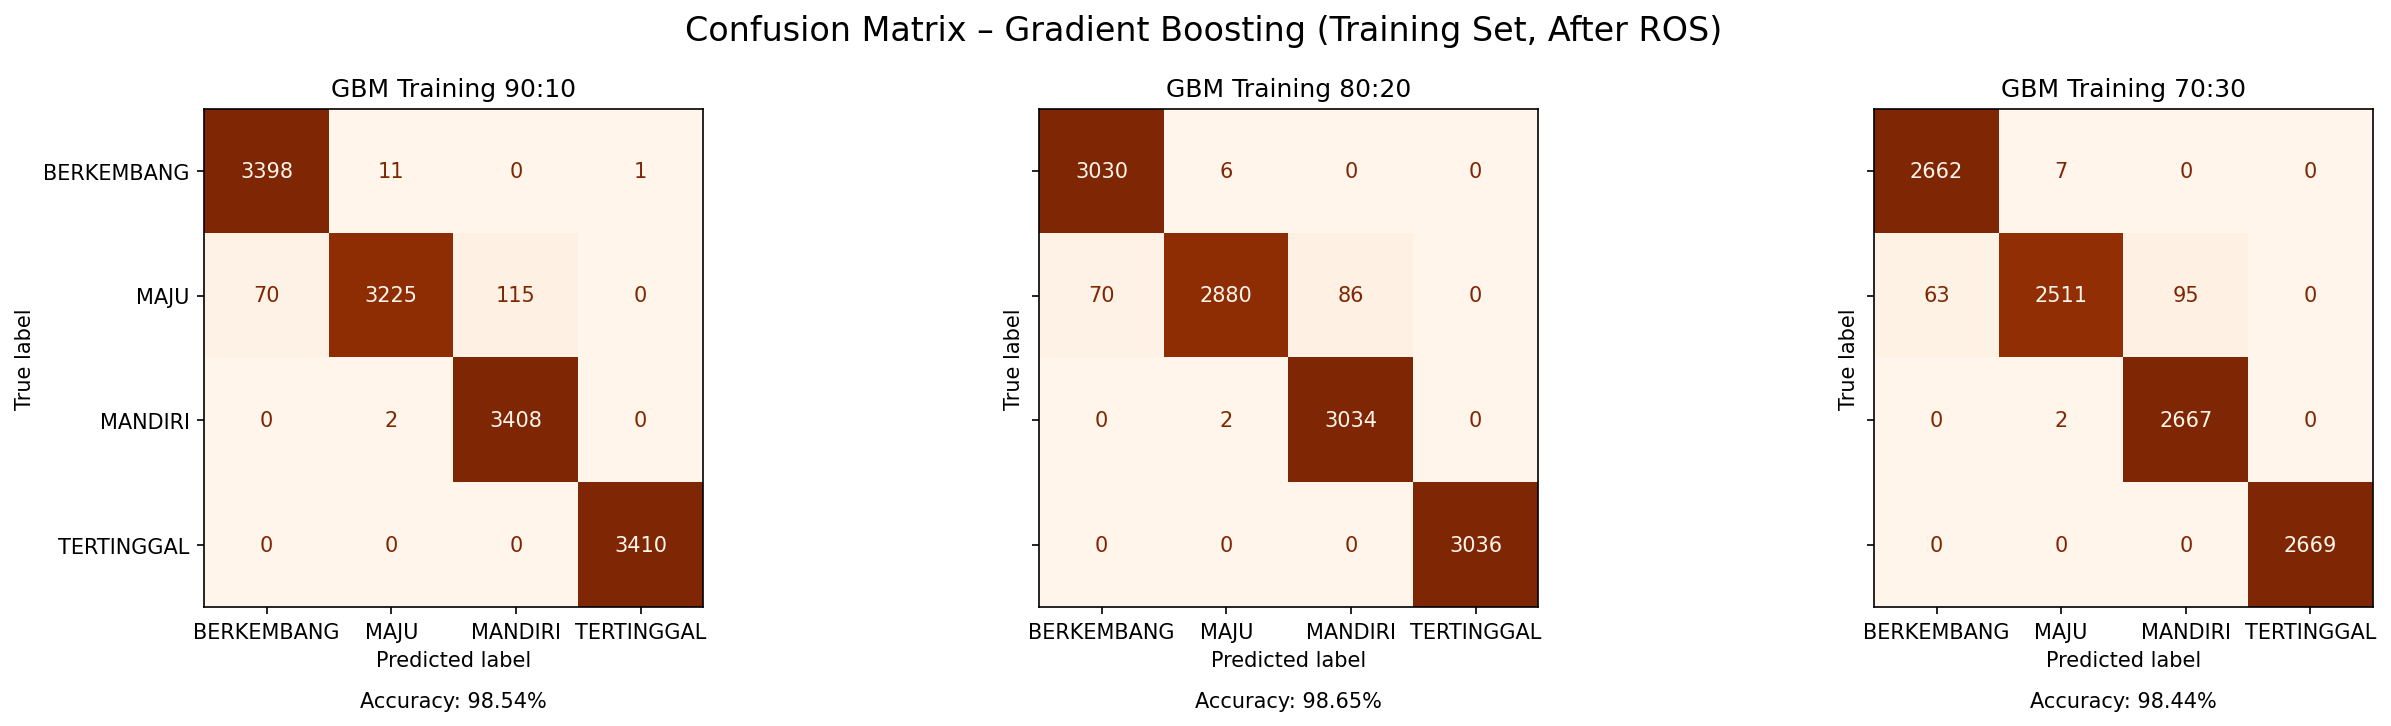

In [27]:
# List of GBM models and training data
gbm_train_data = {
    "90:10": (gbm_model_90, X_train_ros_90, y_train_ros_90),
    "80:20": (gbm_model_80, X_train_ros_80, y_train_ros_80),
    "70:30": (gbm_model_70, X_train_ros_70, y_train_ros_70),
}

# Get unique labels from one of the training sets
class_labels = sorted(np.unique(y_train_ros_90))

# Create subplot with 1 row
fig, axes = plt.subplots(1, 3, figsize=(18, 5), dpi=150, sharex=True, sharey=True)

# Loop through each split
for i, (split_name, (model, X_train, y_train)) in enumerate(gbm_train_data.items()):
    y_pred = model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred, labels=class_labels)
    acc = accuracy_score(y_train, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=axes[i], cmap="Oranges", colorbar=False)
    axes[i].set_title(f"GBM Training {split_name}")
    axes[i].grid(False)
    axes[i].text(0.5, -0.2, f"Accuracy: {acc:.2%}", transform=axes[i].transAxes, ha='center', fontsize=10)

plt.suptitle("Confusion Matrix – Gradient Boosting (Training Set, After ROS)", fontsize=16)
plt.tight_layout()
plt.show()

## **Evaluation**
---

In [28]:
# Random Forest
rf_pred_90 = rf_model_90.predict(X_test_90)
rf_pred_80 = rf_model_80.predict(X_test_80)
rf_pred_70 = rf_model_70.predict(X_test_70)

# Gradient Boosting
gbm_pred_90 = gbm_model_90.predict(X_test_90)
gbm_pred_80 = gbm_model_80.predict(X_test_80)
gbm_pred_70 = gbm_model_70.predict(X_test_70)

### Confusion Matrix

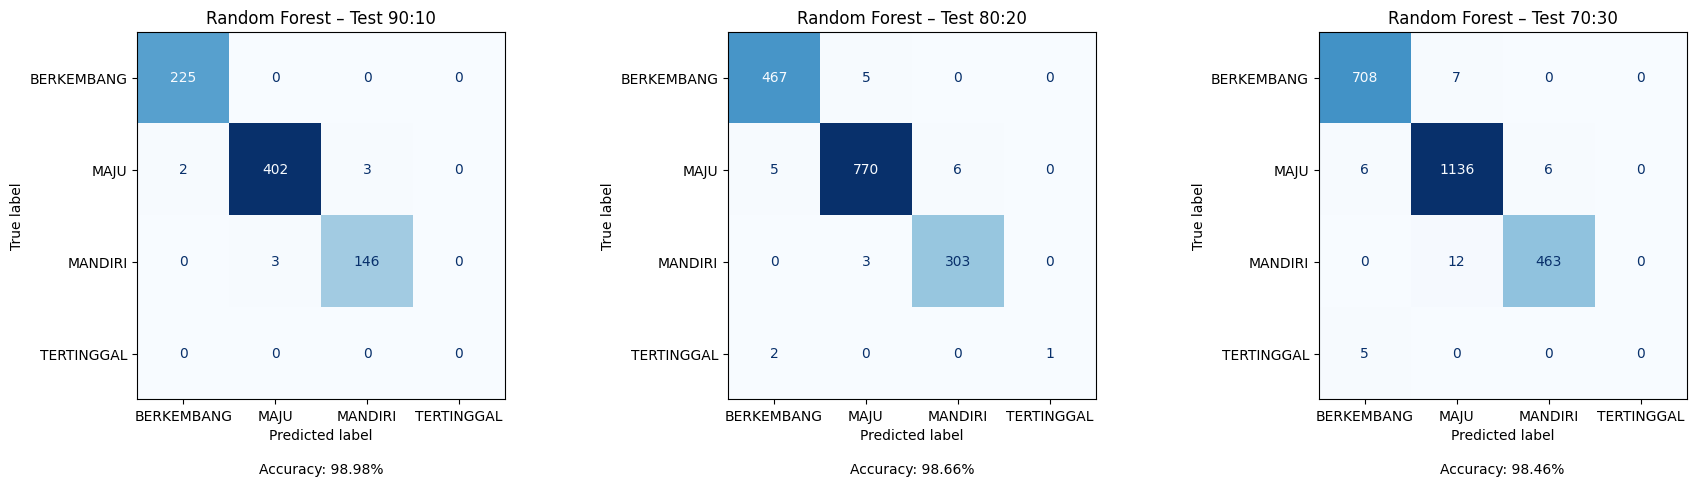

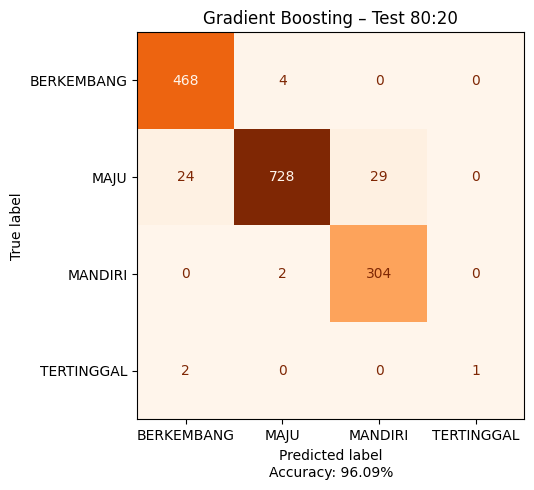

In [29]:
# Sorting class labels from the data
class_labels = sorted(np.unique(y))

# RANDOM FOREST
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for ax, y_test, y_pred, title in zip(
    axs,
    [y_test_90, y_test_80, y_test_70],
    [rf_pred_90, rf_pred_80, rf_pred_70],
    ["Random Forest – Test 90:10", "Random Forest – Test 80:20", "Random Forest – Test 70:30"]
):
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)
    acc = accuracy_score(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(title)
    ax.grid(False)
    ax.text(0.5, -0.2, f"Accuracy: {acc:.2%}", transform=ax.transAxes, ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# GRADIENT BOOSTING
cm_gbm_80 = confusion_matrix(y_test_80, gbm_pred_80, labels=class_labels)
acc_gbm_80 = accuracy_score(y_test_80, gbm_pred_80)

disp_gbm_80 = ConfusionMatrixDisplay(confusion_matrix=cm_gbm_80, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(6, 5))
disp_gbm_80.plot(ax=ax, cmap="Oranges", colorbar=False)
ax.set_title("Gradient Boosting – Test 80:20")
ax.grid(False)
ax.text(0.5, -0.15, f"Accuracy: {acc_gbm_80:.2%}", transform=ax.transAxes, ha='center', fontsize=10)

plt.tight_layout()
plt.show()

### Comparison

In [30]:
# List of evaluation results
results = []

# Data only for RF 90:10 and GB 80:20
selected_splits = [
    {
        "split": "90:10",
        "y_true": y_test_90,
        "models": {
            "Random Forest ROS 90:10": rf_pred_90
        }
    },
    {
        "split": "80:20",
        "y_true": y_test_80,
        "models": {
            "Gradient Boosting ROS 80:20": gbm_pred_80
        }
    }
]

# Evaluation
for split_data in selected_splits:
    y_true = np.array(split_data["y_true"])
    for model_name, y_pred in split_data["models"].items():
        y_pred = np.array(y_pred)

        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, average="macro", zero_division=1)
        rec = recall_score(y_true, y_pred, average="macro", zero_division=1)
        f1 = f1_score(y_true, y_pred, average="macro", zero_division=1)
        gmean = geometric_mean_score(y_true, y_pred, average="multiclass")

        results.append({
            "Split": split_data["split"],
            "Model": model_name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1 Score": f1,
            "G-Mean": gmean
        })

# Display results
results_df = pd.DataFrame(results)
display(results_df)

,Split,Model,Accuracy,Precision,Recall,F1 Score,G-Mean
0,90:10,Random Forest ROS 90:10,0.989757,0.987883,0.989194,0.988530,0.989159
1,80:20,Gradient Boosting ROS 80:20,0.960948,0.963027,0.812615,0.845372,0.743796


## **Conclusion**
---

Accuracy represents the proportion of overall correct predictions compared to the total number of test data. **Random Forest achieved an accuracy of 98.97%, higher than Gradient Boosting** which recorded 96.69%. This difference indicates that, in general, Random Forest is able to classify data with greater precision. <br>
G-Mean is a key evaluation metric in the context of imbalanced data because it measures the balance of model performance in recognizing both majority and minority classes. **Random Forest recorded a G-Mean value of 98.91%, higher than Gradient Boosting** which obtained 74.38%. This gap shows that Random Forest has a better capability in handling class distribution imbalance fairly. <br>
Random Forest also demonstrated higher performance compared to Gradient Boosting across other metrics. This strengthens the position of `Random Forest as the most optimal algorithm for classifying IDM staus in Central Java`.

## **Streamlit**
Streamlit is an open-source Python framework for building interactive web applications for data science and machine learning.

---

In [31]:
df

,iks_2024,ike_2024,ikl_2024,status_idm_2024
0,0.8343,0.6667,0.6667,MAJU
1,0.8229,0.6167,0.6000,BERKEMBANG
2,0.8000,0.6500,0.8000,MAJU
3,0.8514,0.5667,0.6667,BERKEMBANG
4,0.8343,0.6167,0.6000,BERKEMBANG
...,...,...,...,...
7805,0.8114,0.6500,0.6667,MAJU
7806,0.8000,0.6000,0.8000,MAJU
7807,0.8343,0.6500,0.6667,MAJU
7808,0.7600,0.6167,0.6667,BERKEMBANG


In [32]:
import joblib

# Save model
joblib.dump(rf_model_90, 'rf_model_90.joblib')
joblib.dump(gbm_model_80, 'gbm_model_80.joblib')

print("Model berhasil dibuat!")

Model berhasil dibuat!


In [33]:
import streamlit as st
import numpy as np
import pandas as pd
from PIL import Image
import plotly.express as px
import os
import joblib

# Model selection
st.sidebar.subheader("Pilih Model")
model_option = st.sidebar.selectbox("Model:", ["Random Forest", "Gradient Boosting"])

# Title
st.title(f"Klasifikasi Status Indeks Desa Membangun di Jawa Tengah Algoritma Machine Learning: {model_option}")

# Layout & Logo
st.set_page_config(page_title="Klasifikasi Status Desa", page_icon="📊", layout="wide")

# Load and display logo
if os.path.exists("logo_undip.png"):
    logo = Image.open("logo_undip.png")
    st.image(logo, width=150)
else:
    st.warning("Logo tidak ditemukan")

# IDM and algorithm explanation section
with st.expander("📝 Penjelasan IDM dan Algoritma"):
    st.markdown("**Indeks Desa Membangun (IDM)** adalah indeks yang digunakan untuk mengukur tingkat perkembangan desa di Indonesia. IDM dibentuk dari tiga dimensi: **IKS**, **IKE**, dan **IKL**.")
    
    if model_option == "Random Forest":
        st.markdown("**🌳 Apa itu Random Forest?** Random Forest bekerja dengan membangun sejumlah pohon keputusan dan kemudian menggabungkan hasilnya untuk membuat prediksi akhir. Setiap pohon dilatih pada sampel acak dari data (bagging). Untuk klasifikasi, keluaran akhir ditentukan oleh suara mayoritas dari semua pohon.")
    else:
        st.markdown("**🚀 Apa itu Gradient Boosting?** Gradient Boosting membangun model prediktif yang kuat dengan menggabungkan banyak *weak learner* (pohon keputusan) secara berurutan. Setiap pohon baru dilatih untuk memperbaiki kesalahan (residual) yang dibuat oleh pohon-pohon sebelumnya.")

# Load model file
model_file = "rf_model_90.joblib" if model_option == "Random Forest" else "gbm_model_80.joblib"

if not os.path.exists(model_file):
    st.error(f"File model '{model_file}' tidak ditemukan!")
    st.stop()

try:
    model = joblib.load(model_file)
    st.sidebar.success(f"✅ Model {model_option} berhasil dimuat")
except Exception as e:
    st.error(f"Gagal memuat model: {e}")
    st.stop()

# Manual input section
st.subheader("Input Manual")
col1, col2, col3 = st.columns(3)

iks = col1.number_input("IKS", 0.0, 1.0, 0.5, 0.01)
ike = col2.number_input("IKE", 0.0, 1.0, 0.5, 0.01)
ikl = col3.number_input("IKL", 0.0, 1.0, 0.5, 0.01)

# Button to classify manual input
if st.button("Klasifikasi Manual"):
    try:
        features = np.array([[iks, ike, ikl]])
        pred = model.predict(features)[0]
        idm_manual = np.mean(features)
        st.success(f"Kelas: {pred}")
        st.info(f"Nilai IDM: {idm_manual:.3f}")
    except Exception as e:
        st.error(f"Error dalam prediksi: {e}")

# CSV upload section for batch prediction
st.subheader("Upload CSV untuk Prediksi Status Desa")
uploaded_file = st.file_uploader("Pilih CSV", type=["csv"])

if uploaded_file is not None:
    try:
        df = pd.read_csv(uploaded_file)
        st.write("Data yang diupload:")
        st.dataframe(df.head())

        required_cols = ['iks_2024', 'ike_2024', 'ikl_2024']
        if all(col in df.columns for col in required_cols):
            # Calculate IDM value and make predictions
            df['status_idm_2024'] = df[required_cols].mean(axis=1).round(3)
            X = df[required_cols].values
            df['prediksi'] = model.predict(X)

            st.write("Hasil Prediksi + IDM:")
            st.dataframe(df)

            # Button to download CSV with prediction results
            csv = df.to_csv(index=False).encode('utf-8')
            st.download_button(
                "💾 Download Hasil Prediksi",
                data=csv,
                file_name="hasil_prediksi.csv",
                mime="text/csv"
            )

            # Visualization of prediction distribution
            pie_data = df['prediksi'].value_counts().reset_index()
            pie_data.columns = ['Kelas', 'Jumlah']

            fig_pie = px.pie(pie_data, values='Jumlah', names='Kelas',
                             title="Distribusi Prediksi", hole=0.3)
            st.plotly_chart(fig_pie, use_container_width=True)

            fig_bar = px.bar(pie_data, x='Kelas', y='Jumlah', text='Jumlah', title="Jumlah per Kelas")
            fig_bar.update_traces(textposition='outside')
            st.plotly_chart(fig_bar, use_container_width=True)

        else:
            # Error handling for missing columns
            missing = [col for col in required_cols if col not in df.columns]
            st.error(f"Kolom hilang: {missing}")

    except Exception as e:
        st.error(f"Error: {e}")

2025-08-25 06:17:54.021 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 06:17:55.127 
  command:

    streamlit run C:\Users\SARAH\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-25 06:17:55.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 06:17:55.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 06:17:55.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 06:17:55.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 06:17:55.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 06:17:55.127 Thre

In [34]:
code = """
import streamlit as st
import numpy as np
import pandas as pd
from PIL import Image
import plotly.express as px
import os
import joblib

# Model selection
st.sidebar.subheader("Pilih Model")
model_option = st.sidebar.selectbox("Model:", ["Random Forest", "Gradient Boosting"])

# Title
st.title(f"Klasifikasi Status Indeks Desa Membangun di Jawa Tengah Algoritma Machine Learning: {model_option}")

# Layout & Logo
st.set_page_config(page_title="Klasifikasi Status Desa", page_icon="📊", layout="wide")

# Load and display logo
if os.path.exists("logo_undip.png"):
    logo = Image.open("logo_undip.png")
    st.image(logo, width=150)
else:
    st.warning("Logo tidak ditemukan")

# IDM and algorithm explanation section
with st.expander("📝 Penjelasan IDM dan Algoritma"):
    st.markdown("**Indeks Desa Membangun (IDM)** adalah indeks yang digunakan untuk mengukur tingkat perkembangan desa di Indonesia. IDM dibentuk dari tiga dimensi: **IKS**, **IKE**, dan **IKL**.")
    
    if model_option == "Random Forest":
        st.markdown("**🌳 Apa itu Random Forest?** Random Forest bekerja dengan membangun sejumlah pohon keputusan dan kemudian menggabungkan hasilnya untuk membuat prediksi akhir. Setiap pohon dilatih pada sampel acak dari data (bagging). Untuk klasifikasi, keluaran akhir ditentukan oleh suara mayoritas dari semua pohon.")
    else:
        st.markdown("**🚀 Apa itu Gradient Boosting?** Gradient Boosting membangun model prediktif yang kuat dengan menggabungkan banyak *weak learner* (pohon keputusan) secara berurutan. Setiap pohon baru dilatih untuk memperbaiki kesalahan (residual) yang dibuat oleh pohon-pohon sebelumnya.")

# Load model file
model_file = "rf_model_90.joblib" if model_option == "Random Forest" else "gbm_model_80.joblib"

if not os.path.exists(model_file):
    st.error(f"File model '{model_file}' tidak ditemukan!")
    st.stop()

try:
    model = joblib.load(model_file)
    st.sidebar.success(f"✅ Model {model_option} berhasil dimuat")
except Exception as e:
    st.error(f"Gagal memuat model: {e}")
    st.stop()

# Manual input section
st.subheader("Input Manual")
col1, col2, col3 = st.columns(3)

iks = col1.number_input("IKS", 0.0, 1.0, 0.5, 0.01)
ike = col2.number_input("IKE", 0.0, 1.0, 0.5, 0.01)
ikl = col3.number_input("IKL", 0.0, 1.0, 0.5, 0.01)

# Button to classify manual input
if st.button("Klasifikasi Manual"):
    try:
        features = np.array([[iks, ike, ikl]])
        pred = model.predict(features)[0]
        idm_manual = np.mean(features)
        st.success(f"Kelas: {pred}")
        st.info(f"Nilai IDM: {idm_manual:.3f}")
    except Exception as e:
        st.error(f"Error dalam prediksi: {e}")

# CSV upload section for batch prediction
st.subheader("Upload CSV untuk Prediksi Status Desa")
uploaded_file = st.file_uploader("Pilih CSV", type=["csv"])

if uploaded_file is not None:
    try:
        df = pd.read_csv(uploaded_file)
        st.write("Data yang diupload:")
        st.dataframe(df.head())

        required_cols = ['iks_2024', 'ike_2024', 'ikl_2024']
        if all(col in df.columns for col in required_cols):
            # Calculate IDM value and make predictions
            df['status_idm_2024'] = df[required_cols].mean(axis=1).round(3)
            X = df[required_cols].values
            df['prediksi'] = model.predict(X)

            st.write("Hasil Prediksi + IDM:")
            st.dataframe(df)

            # Button to download CSV with prediction results
            csv = df.to_csv(index=False).encode('utf-8')
            st.download_button(
                "💾 Download Hasil Prediksi",
                data=csv,
                file_name="hasil_prediksi.csv",
                mime="text/csv"
            )

            # Visualization of prediction distribution
            pie_data = df['prediksi'].value_counts().reset_index()
            pie_data.columns = ['Kelas', 'Jumlah']

            fig_pie = px.pie(pie_data, values='Jumlah', names='Kelas',
                             title="Distribusi Prediksi", hole=0.3)
            st.plotly_chart(fig_pie, use_container_width=True)

            fig_bar = px.bar(pie_data, x='Kelas', y='Jumlah', text='Jumlah', title="Jumlah per Kelas")
            fig_bar.update_traces(textposition='outside')
            st.plotly_chart(fig_bar, use_container_width=True)

        else:
            # Error handling for missing columns
            missing = [col for col in required_cols if col not in df.columns]
            st.error(f"Kolom hilang: {missing}")

    except Exception as e:
        st.error(f"Error: {e}")
"""

# Save file app.py
with open("app.py", "w", encoding="utf-8") as f:
    f.write(code)

print("✅ File app.py berhasil dibuat!")

✅ File app.py berhasil dibuat!
